In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimpy

In [2]:
x = skimpy.IntArray(10, 1)

In [3]:
x

Array<int>([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
x[4:7]

Array<int>([1, 1, 1])

In [5]:
%%time
x[3:6] = 2

Wall time: 0 ns


In [6]:
x

Array<int>([1, 1, 1, 2, 2, 2, 1, 1, 1, 1])

In [7]:
%%time
x[5:9] = 3

Wall time: 0 ns


In [8]:
%%time
2 * x

Wall time: 0 ns


Array<int>([2, 2, 2, 4, 4, 6, 6, 6, 6, 2])

In [9]:
%%time
y = 2 * x

Wall time: 0 ns


In [10]:
y

Array<int>([2, 2, 2, 4, 4, 6, 6, 6, 6, 2])

In [11]:
x

Array<int>([1, 1, 1, 2, 2, 3, 3, 3, 3, 1])

In [12]:
%%time
((x + y)**x + 56 * x - 3 * x) // x**2

Wall time: 0 ns


Array<int>([56, 56, 56, 35, 35, 98, 98, 98, 98, 56])

In [21]:
%%time
boop = skimpy.IntArray(1024 * 1024, 1)
for i in range(100 * 1024):
    boop[i] = i

Wall time: 9.56 s


In [23]:
%%time
builder = skimpy.IntArrayBuilder(1024 * 1024, 1)
for i in range(1024 * 1024):
    builder[i] = i
big = builder.build()

Wall time: 18.7 s


In [52]:
%%timeit
(big * big * big * big * big * big * big * big).eval()

48.5 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [75]:
big = skimpy.from_numpy(np.arange(2 * 1024 * 1024))
new_big = big.clone()

In [77]:
%%time
new_big = (big * big).eval()

Wall time: 34.6 ms


In [79]:
%%time
k = len(big) // 2
new_big[0 * k:1 * k] = (big[0 * k:1 * k] * big[0 * k:1 * k]).eval()
new_big[1 * k:2 * k] = (big[1 * k:2 * k] * big[1 * k:2 * k]).eval()

Wall time: 33.3 ms


In [28]:
%%timeit
(big * big * big * big * big * big * big * big)[100:200].eval()

193 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [56]:
%%timeit
big = skimpy.from_numpy(np.arange(1024 * 1024))
(big * big * big * big * big * big * big * big).eval()

53.2 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%%timeit
big = np.arange(1024 * 1024)
big * big * big * big * big * big * big * big

12.2 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%time
x = np.zeros(1024 * 1024, dtype=np.int32)
for i in range(1024 * 1024):
    x[i] = i

71.4 ms ± 283 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%%timeit
x * x * x * x * x * x * x * x

11 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%%time
D = 4096
R = D // 4
builder = skimpy.IntArrayBuilder(D * D, 0)
for y in range(D):
    discriminant = R**2 - (y - D // 2 + 0.5)**2
    if discriminant < 0:
        continue
    x_0 = int(D // 2 - 0.5 - discriminant**0.5)
    x_1 = int(D // 2 - 0.5 + discriminant**0.5)  
    i = D * y + x_0
    j = D * y + x_1
    builder[i:j] = 1
disc = builder.build()

Wall time: 53 ms


In [41]:
%%timeit
disc * disc

4.89 µs ± 29.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
%%time
img = disc.to_numpy().reshape(D, D)

Wall time: 43 ms


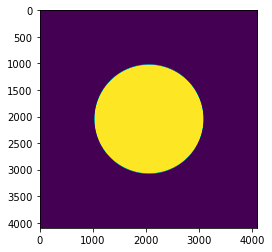

In [45]:
plt.imshow(img)

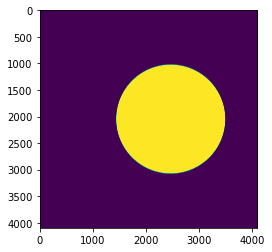

In [46]:
shift_x = disc.clone()
shift_x[D // 10:] = disc[:-(D // 10)]
plt.imshow(shift_x.to_numpy().reshape(D, D))

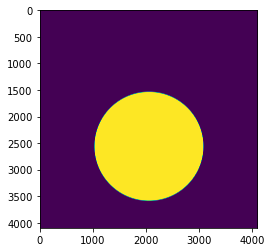

In [47]:
shift_y = disc.clone()
shift_y[D // 8 * D:] = disc[:-D // 8 * D]
plt.imshow(shift_y.to_numpy().reshape(D, D))

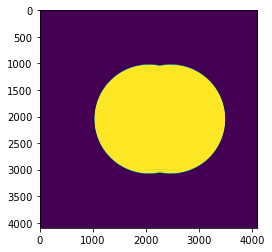

In [48]:
plt.imshow((disc | shift_x).to_numpy().reshape(D, D))

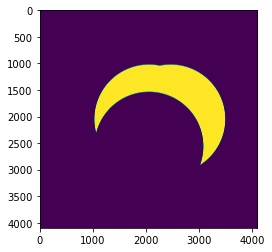

In [49]:
plt.imshow(((disc | shift_x) & ~shift_y).to_numpy().reshape(D, D))

In [50]:
%%timeit
len(((disc | shift_x) & ~shift_y).to_numpy().dumps())

195 ms ± 92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
%%timeit
len(((disc | shift_x) & ~shift_y).dumps())

770 µs ± 64.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
